In [17]:
import pandas as pd
from keras import layers
from keras.datasets import reuters

In [18]:
(train_data, train_label), (test_data, test_label) = reuters.load_data(num_words=10000)

C:\Users\hp\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\hp\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [19]:
len(train_data)

8982

In [20]:
len(test_data)

2246

In [21]:
#let us decode the data 
word_index = reuters.get_word_index()
reserved_word_index = dict([(value,key) for  (key, value) in word_index.items()])
decoded_newswire = " ".join([reserved_word_index.get(i-3,'?') for i in train_data[10]])#we take i-3 because 0,1,2 is reserverd for padding and . ,
print(decoded_newswire)

? period ended december 31 shr profit 11 cts vs loss 24 cts net profit 224 271 vs loss 511 349 revs 7 258 688 vs 7 200 349 reuter 3


In [104]:
train_label[10] # we have 46 clases so the labels are from 0-45

3

In [105]:
import numpy as np

In [107]:
def vec_seq(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i , sequence in enumerate(sequences):
        results[i , sequence] = 1.
    return results

x_train  = vec_seq(train_data)
x_test = vec_seq(test_data)

In [120]:
def one_hot(labels, dimension=46):
    results = np.zeros((len(labels),dimension))
    for i , label in enumerate(labels):
        results[i , label] = 1.
    return results

one_hot_train_labels = one_hot(train_label)
one_hot_test_labels = one_hot(test_label)

In [121]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [126]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

In [127]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]


In [130]:
history = model.fit(partial_x_train,partial_y_train, epochs=20, batch_size=512, validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 0s 27ms/step - loss: 0.1092 - accuracy: 0.9589 - val_loss: 1.0647 - val_accuracy: 0.7950
Epoch 2/20
16/16 [==============================] - 0s 23ms/step - loss: 0.1076 - accuracy: 0.9574 - val_loss: 1.0811 - val_accuracy: 0.8030
Epoch 3/20
16/16 [==============================] - 0s 24ms/step - loss: 0.1072 - accuracy: 0.9569 - val_loss: 1.0962 - val_accuracy: 0.8020
Epoch 4/20
16/16 [==============================] - 0s 23ms/step - loss: 0.1013 - accuracy: 0.9575 - val_loss: 1.1120 - val_accuracy: 0.8040
Epoch 5/20
16/16 [==============================] - 0s 24ms/step - loss: 0.1031 - accuracy: 0.9590 - val_loss: 1.1434 - val_accuracy: 0.8020
Epoch 6/20
16/16 [==============================] - 0s 24ms/step - loss: 0.0995 - accuracy: 0.9573 - val_loss: 1.2919 - val_accuracy: 0.7810
Epoch 7/20
16/16 [==============================] - 0s 23ms/step - loss: 0.1000 - accuracy: 0.9583 - val_loss: 1.1461 - val_accuracy: 0.7950
Epoch 8/20
16

In [133]:
history_dict = history.history

In [134]:
print(history_dict)

{'loss': [0.10918275266885757, 0.10758357495069504, 0.10720338672399521, 0.10132987797260284, 0.10313645005226135, 0.09948397427797318, 0.0999685525894165, 0.09816429764032364, 0.09598550200462341, 0.09341371804475784, 0.09602340310811996, 0.0942852720618248, 0.09952377527952194, 0.08603774756193161, 0.09588600695133209, 0.08921071141958237, 0.09044889360666275, 0.08911934494972229, 0.09481531381607056, 0.08489643782377243], 'accuracy': [0.9589075446128845, 0.9574041366577148, 0.9569030404090881, 0.9575294256210327, 0.9590328335762024, 0.957278847694397, 0.9582811594009399, 0.9580305814743042, 0.9591581225395203, 0.9581558704376221, 0.9579052925109863, 0.9587822556495667, 0.9574041366577148, 0.9597845077514648, 0.9571536183357239, 0.9600350856781006, 0.9606614708900452, 0.9576547145843506, 0.9575294256210327, 0.9589075446128845], 'val_loss': [1.0647000074386597, 1.0811347961425781, 1.0962073802947998, 1.1120364665985107, 1.1434009075164795, 1.2918649911880493, 1.1461071968078613, 1.188

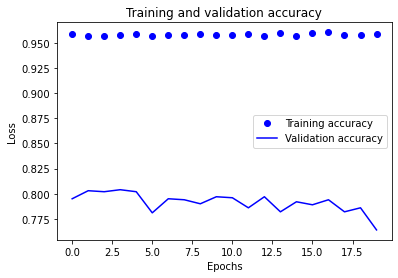

In [135]:
import matplotlib.pyplot as plt
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = [i  for i in range(len(loss))]

# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


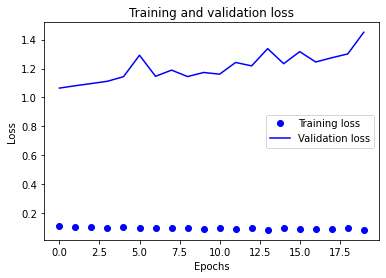

In [136]:
import matplotlib.pyplot as plt
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = [i  for i in range(len(loss))]


# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [137]:
results = model.evaluate(x_test, one_hot_test_labels )

71/71 [==============================] - 0s 2ms/step - loss: 1.6186 - accuracy: 0.7573


In [138]:
results

[1.6185632944107056, 0.7573463916778564]

In [139]:
predictions = model.predict(x_test)